## Twitter Sentiment Analysis for US Airlines- using Scikit-Learn

In [1]:
#relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [2]:
# input tweets data
tweets=pd.read_csv("Tweets.csv")
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
# keep relevant variables for classification of sentiments- sentiment & tweet text

tweets_data=tweets[['airline_sentiment','text']]
tweets_data.shape
# data has 14,640 observations

(14640, 2)

In [4]:
#check for missingness
tweets_data.isnull().sum()

airline_sentiment    0
text                 0
dtype: int64

In [5]:
# convert string sentiment categories to numeric data
tweets_data['sentiment_type']=tweets_data['airline_sentiment'].replace({'positive':2,'neutral':1,'negative':0})
tweets_data.head()

C:\Users\aditi\Anaconda3_3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,airline_sentiment,text,sentiment_type
0,neutral,@VirginAmerica What @dhepburn said.,1
1,positive,@VirginAmerica plus you've added commercials t...,2
2,neutral,@VirginAmerica I didn't today... Must mean I n...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


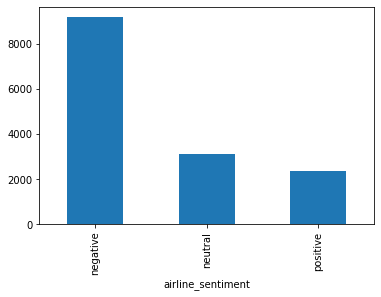

In [8]:
tweets_data.groupby('airline_sentiment').text.count().plot.bar(ylim=0)
plt.show()

### Preprocessing data

In [9]:
#Clean Text by removing user handles, stop words, word less than 3 characters, etc.
# Code from:
# https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
import re

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [10]:
# remove twitter handles (@user)
tweets_data['tidy_tweet'] = np.vectorize(remove_pattern)(tweets_data['text'], "@[\w]*")
# remove special characters, numbers, punctuations
tweets_data['tidy_tweet'] = tweets_data['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")
# remove words less than 3 characters long
tweets_data['tidy_tweet'] = tweets_data['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))
tweets_data['tidy_tweet'] = tweets_data['tidy_tweet'].apply(lambda x:x.lower())

C:\Users\aditi\Anaconda3_3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\aditi\Anaconda3_3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\aditi\Anaconda3_3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [11]:
tweets_data.head()

,airline_sentiment,text,sentiment_type,tidy_tweet
0,neutral,@VirginAmerica What @dhepburn said.,1,what said
1,positive,@VirginAmerica plus you've added commercials t...,2,plus you added commercials the experience tacky
2,neutral,@VirginAmerica I didn't today... Must mean I n...,1,didn today must mean need take another trip
3,negative,@VirginAmerica it's really aggressive to blast...,0,really aggressive blast obnoxious entertainmen...
4,negative,@VirginAmerica and it's a really big bad thing...,0,and really big bad thing about


In [12]:
X=tweets_data['tidy_tweet']
y=tweets_data['sentiment_type']

In [13]:
#One-hot Encoding for airline sentiment
#labels = to_categorical(np.asarray(y))
#labels

In [14]:
#tokenize the text
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(X).toarray()

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score


models = [
    XGBClassifier(),
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, processed_features, y, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\aditi\Anaconda3_3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditi\Anaconda3_3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\aditi\Anaconda3_3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\aditi\Anaconda3_3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\aditi\Anaconda3_3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: 

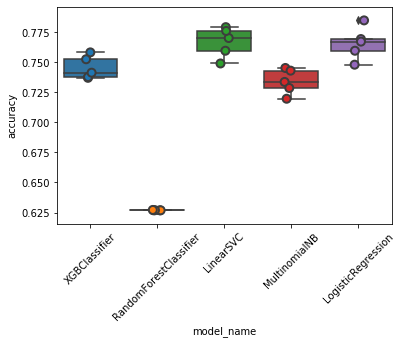

In [19]:
import seaborn as sns

x1=sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
x1.set_xticklabels(x1.get_xticklabels(), rotation=45)
plt.show()

In [23]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending=False)

model_name
LinearSVC                 0.766875
LogisticRegression        0.765848
XGBClassifier             0.745424
MultinomialNB             0.734085
RandomForestClassifier    0.626913
Name: accuracy, dtype: float64

### Given the above results, we attempt Linear Support Vector classifier, logistic regression and XGBoost classifier models

#### Model 1: Linear SVC model

In [25]:
# Linear SVC
model_1 = LinearSVC()
#Train test split
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(processed_features, y, tweets_data.index, test_size=0.3, random_state=1011)
# train the model
model_1.fit(X_train, y_train)
# prediction
y_pred = model_1.predict(X_test)

In [27]:
#confusion matrix
#cm = 
print(confusion_matrix(y_test, y_pred))
#fig, ax = plt.subplots(figsize=(8,6))
#sns.heatmap(cm, annot=True, fmt='d',
           # xticklabels=tweets_data['airline_sentiment'].values, yticklabels=tweets_data['airline_sentiment'].values)
#plt.ylabel('Actual')
#plt.xlabel('Predicted')
#plt.show()

[[2467  207   86]
 [ 343  487   94]
 [ 159  102  447]]


In [28]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=tweets_data['airline_sentiment'].unique()))

              precision    recall  f1-score   support

     neutral       0.83      0.89      0.86      2760
    positive       0.61      0.53      0.57       924
    negative       0.71      0.63      0.67       708

    accuracy                           0.77      4392
   macro avg       0.72      0.68      0.70      4392
weighted avg       0.77      0.77      0.77      4392



##### Model 2: Logistic Regression 

In [37]:
model_2 = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='multinomial', max_iter=1000, random_state=101) # uses the cross-entropy loss
# train the model
model_2.fit(X_train, y_train)
# prediction
y_pred = model_2.predict(X_test)

In [38]:
print(confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, target_names=tweets_data['airline_sentiment'].unique()))

[[2575  139   46]
 [ 433  428   63]
 [ 206   98  404]]
              precision    recall  f1-score   support

     neutral       0.80      0.93      0.86      2760
    positive       0.64      0.46      0.54       924
    negative       0.79      0.57      0.66       708

    accuracy                           0.78      4392
   macro avg       0.74      0.66      0.69      4392
weighted avg       0.77      0.78      0.76      4392



In [ ]:
##### Model 3: Random Forest  

In [25]:
from sklearn.ensemble import RandomForestClassifier

model_3 = RandomForestClassifier(n_estimators=200, max_depth=2, random_state=1011)

In [26]:
model_3.fit(X_train, y_train)
y_pred = model_2.predict(X_test)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1011,
                       verbose=0, warm_start=False)

In [31]:
predictions=rfc.predict(X_test_sk)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
sum(X_test_sk)

array([3.08539535, 1.14571518, 0.60728564, ..., 2.8091656 , 5.02267894,
       0.53996242])

In [28]:
from sklearn.metrics import multilabel_confusion_matrix

print(multilabel_confusion_matrix(y_test_sk,predictions))
#print(classification_report(y_test_sk,predictions))
#print(accuracy_score(y_test_sk, predictions))

[[[   0 1632]
  [   0 2760]]

 [[3468    0]
  [ 924    0]]

 [[3684    0]
  [ 708    0]]]
